# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# For Deep Learning (RNN)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense


In [3]:
import os

csv_files = [
    'building_1.csv',    'building_2.csv',  'building_3.csv',
    'building_4.csv',    'building_5.csv',  'building_6.csv',
    'building_7.csv'
]

data_dir = r'F:\ML Lab Spring 25\Open ended lab'
csv_paths = [os.path.join(data_dir, f) for f in csv_files]

# Merge CSVs
merged_df = pd.concat([pd.read_csv(f) for f in csv_paths], ignore_index=True)

# Replace NaNs with 0
merged_df.fillna(0, inplace=True)

# Save the result
merged_df.to_csv('merged_output.csv', index=False)

print("Merged and cleaned CSV saved as 'merged_output.csv'")


Merged and cleaned CSV saved as 'merged_output.csv'


# Loading the CSV Files

In [4]:
import pandas as pd
# Load the CSV files you uploaded
building_data = pd.read_csv(r'F:\ML Lab Spring 25\Open ended lab\Datasets\merged_output.csv')
carbon_intensity_data = pd.read_csv(r'F:\ML Lab Spring 25\Open ended lab\Datasets\carbon_intensity.csv')
pricing_data = pd.read_csv(r'F:\ML Lab Spring 25\Open ended lab\Datasets\pricing.csv')
weather_data = pd.read_csv(r'F:\ML Lab Spring 25\Open ended lab\Datasets\weather.csv')
# Display the first few rows of each dataset to ensure they are loaded correctly
print("Building Data:")
print(building_data.head())
print("Carbon Intensity Data:")
print(carbon_intensity_data.head())
print("Pricing Data:")
print(pricing_data.head())
print("Weather Data:")
print(weather_data.head())

Building Data:
   month  hour  day_type  daylight_savings_status  \
0      7    24         7                        0   
1      8     1         1                        0   
2      8     2         1                        0   
3      8     3         1                        0   
4      8     4         1                        0   

   indoor_dry_bulb_temperature  average_unmet_cooling_setpoint_difference  \
0                          0.0                                        0.0   
1                          0.0                                        0.0   
2                          0.0                                        0.0   
3                          0.0                                        0.0   
4                          0.0                                        0.0   

   indoor_relative_humidity  non_shiftable_load  dhw_demand  cooling_demand  \
0                       0.0            2.275800         0.0             0.0   
1                       0.0            0.8511

# Merging the Files

In [5]:
# Merge the datasets based on 'hour' column
merged_data = building_data.merge(carbon_intensity_data, left_on='hour', right_index=True, how='inner')\
                            .merge(pricing_data, left_on='hour', right_index=True, how='inner')\
                            .merge(weather_data, left_on='hour', right_index=True, how='inner')

# Display the merged data to check the result
print("Merged Data:")
print(merged_data.head())

# Save the merged dataset into a new CSV file
merged_data.to_csv(r'F:\ML Lab Spring 25\Open ended lab\Datasets\merged_data.csv', index=False)

print("Merged dataset saved as 'merged_data.csv'")


Merged Data:
   month  hour  day_type  daylight_savings_status  \
0      7    24         7                        0   
1      8     1         1                        0   
2      8     2         1                        0   
3      8     3         1                        0   
4      8     4         1                        0   

   indoor_dry_bulb_temperature  average_unmet_cooling_setpoint_difference  \
0                          0.0                                        0.0   
1                          0.0                                        0.0   
2                          0.0                                        0.0   
3                          0.0                                        0.0   
4                          0.0                                        0.0   

   indoor_relative_humidity  non_shiftable_load  dhw_demand  cooling_demand  \
0                       0.0            2.275800         0.0             0.0   
1                       0.0            0.851167

# Verifying the Merged Dataset

In [6]:
# Check for missing values in the merged dataset
missing_values = merged_data.isnull().sum()

# Display the missing values for each column
print("Missing Values in Merged Data:")
print(missing_values)

# Check the shape of the merged dataset (rows, columns)
print(f"Merged Data Shape: {merged_data.shape}")

# Compare the number of rows in the original datasets and the merged dataset
print(f"Original Building Data Rows: {building_data.shape[0]}")
print(f"Original Carbon Intensity Data Rows: {carbon_intensity_data.shape[0]}")
print(f"Original Pricing Data Rows: {pricing_data.shape[0]}")
print(f"Original Weather Data Rows: {weather_data.shape[0]}")

# Ensure no rows are lost during the merge (merge with 'inner' means rows with matching keys are kept)
print(f"Rows in Merged Dataset: {merged_data.shape[0]}")


Missing Values in Merged Data:
month                                        0
hour                                         0
day_type                                     0
daylight_savings_status                      0
indoor_dry_bulb_temperature                  0
average_unmet_cooling_setpoint_difference    0
indoor_relative_humidity                     0
non_shiftable_load                           0
dhw_demand                                   0
cooling_demand                               0
heating_demand                               0
solar_generation                             0
carbon_intensity                             0
electricity_pricing                          0
electricity_pricing_predicted_1              0
electricity_pricing_predicted_2              0
electricity_pricing_predicted_3              0
outdoor_dry_bulb_temperature                 0
outdoor_relative_humidity                    0
diffuse_solar_irradiance                     0
direct_solar_irradiance      

# Finding the Correlation

Correlation Matrix:
                                                  month          hour  \
month                                      1.000000e+00  1.414806e-16   
hour                                       1.414806e-16  1.000000e+00   
day_type                                   4.639253e-03  5.679791e-04   
daylight_savings_status                             NaN           NaN   
indoor_dry_bulb_temperature                         NaN           NaN   
average_unmet_cooling_setpoint_difference           NaN           NaN   
indoor_relative_humidity                            NaN           NaN   
non_shiftable_load                         5.686604e-02  1.426333e-01   
dhw_demand                                          NaN           NaN   
cooling_demand                                      NaN           NaN   
heating_demand                                      NaN           NaN   
solar_generation                          -2.504817e-02 -2.428848e-02   
carbon_intensity               

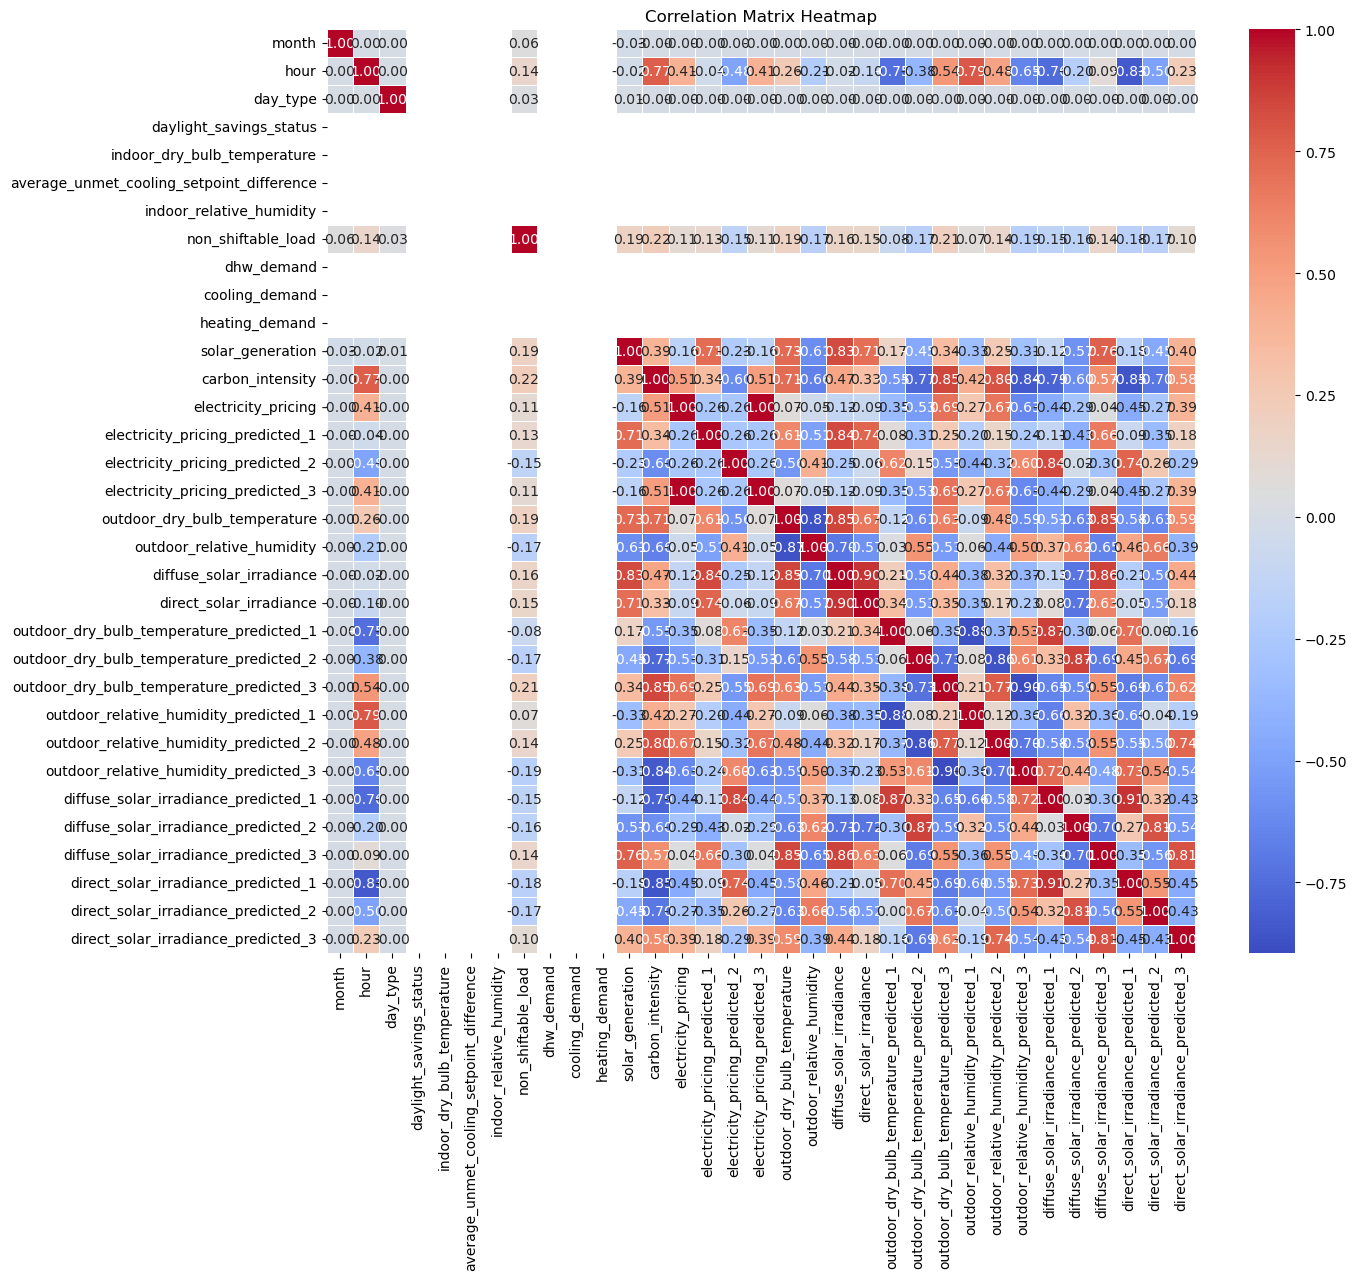

In [7]:
# Calculate the correlation matrix for the merged data
correlation_matrix = merged_data.corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Plotting the correlation matrix using a heatmap
import matplotlib.pyplot as plt
import seaborn as sns

# Create a heatmap of the correlation matrix
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()


# Preparing Data for Training and Testing

In [8]:
# Load the merged dataset
merged_data = pd.read_csv(r'F:\ML Lab Spring 25\Open ended lab\Datasets\merged_data.csv')

# Display the first few rows to check the data
print(merged_data.head())

# Drop the 'hour' column (or any other irrelevant columns for training)
data = merged_data.drop(columns=['hour'])

# Separate features and target variable (let's assume 'carbon_intensity' as the target)
X = data.drop(columns=['carbon_intensity'])  # Features
y = data['carbon_intensity']  # Target variable

# Normalize the features using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Reshape the data for time-series (time step = 10 as an example)
import numpy as np

def create_time_series_data(data, target, time_step=10):
    X, y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:i+time_step])
        y.append(target[i+time_step])
    return np.array(X), np.array(y)

# Prepare the data with time steps
time_step = 10  # You can adjust this based on your dataset
X, y = create_time_series_data(X_scaled, y, time_step)

# Split the data into training, validation, and test sets
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=False)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, shuffle=False)

# Check the shape of the data
print(f"Training data shape: {X_train.shape}")
print(f"Validation data shape: {X_val.shape}")
print(f"Test data shape: {X_test.shape}")


   month  hour  day_type  daylight_savings_status  \
0      7    24         7                        0   
1      8     1         1                        0   
2      8     2         1                        0   
3      8     3         1                        0   
4      8     4         1                        0   

   indoor_dry_bulb_temperature  average_unmet_cooling_setpoint_difference  \
0                          0.0                                        0.0   
1                          0.0                                        0.0   
2                          0.0                                        0.0   
3                          0.0                                        0.0   
4                          0.0                                        0.0   

   indoor_relative_humidity  non_shiftable_load  dhw_demand  cooling_demand  \
0                       0.0            2.275800         0.0             0.0   
1                       0.0            0.851167         0.0 

# Data Preprocessing

In [9]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from sklearn.model_selection import train_test_split

# Drop the 'hour' column and any other irrelevant columns for training
data = merged_data.drop(columns=['hour'])

# Separate features and target variable (assuming 'carbon_intensity' is the target)
X = data.drop(columns=['carbon_intensity'])  # Features
y = data['carbon_intensity']  # Target variable

# Normalize the features using MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Function to create time-series data
def create_time_series_data(data, target, time_step=10):
    X, y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:i+time_step])
        y.append(target[i+time_step])
    return np.array(X), np.array(y)

# Prepare the data with time steps
time_step = 10  # You can adjust this based on your dataset
X, y = create_time_series_data(X_scaled, y, time_step)

# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=False)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, shuffle=False)

# Check the shape of the data
print(f"Training data shape: {X_train.shape}")
print(f"Validation data shape: {X_val.shape}")
print(f"Test data shape: {X_test.shape}")


Training data shape: (42917, 10, 31)
Validation data shape: (9196, 10, 31)
Test data shape: (9197, 10, 31)


# Model Using LSTM Architecture

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Initialize the model
model = Sequential()

# Add the first LSTM layer with 100 units
model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))

# Add Dropout layer to avoid overfitting
model.add(Dropout(0.2))

# Add the second LSTM layer with 50 units
model.add(LSTM(units=50, return_sequences=False))

# Add another Dropout layer
model.add(Dropout(0.2))

# Add the output layer (predicting a single value for regression)
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Summarize the model structure
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10, 100)           52800     
                                                                 
 dropout (Dropout)           (None, 10, 100)           0         
                                                                 
 lstm_1 (LSTM)               (None, 50)                30200     
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 83,051
Trainable params: 83,051
Non-trainable params: 0
_________________________________________________________________


# Training the Model

Epoch 1/20
671/671 [==============================] - 57s 39ms/step - loss: 0.0011 - val_loss: 1.5751e-05
Epoch 2/20
671/671 [==============================] - 23s 34ms/step - loss: 2.2112e-04 - val_loss: 1.3883e-05
Epoch 3/20
671/671 [==============================] - 24s 36ms/step - loss: 1.1839e-04 - val_loss: 1.0436e-05
Epoch 4/20
671/671 [==============================] - 23s 35ms/step - loss: 6.5429e-05 - val_loss: 7.6162e-06
Epoch 5/20
671/671 [==============================] - 25s 37ms/step - loss: 3.8327e-05 - val_loss: 6.5529e-06
Epoch 6/20
671/671 [==============================] - 26s 39ms/step - loss: 2.7430e-05 - val_loss: 5.1822e-06
Epoch 7/20
671/671 [==============================] - 26s 39ms/step - loss: 2.1666e-05 - val_loss: 4.7821e-06
Epoch 8/20
671/671 [==============================] - 26s 39ms/step - loss: 1.8576e-05 - val_loss: 2.6497e-06
Epoch 9/20
671/671 [==============================] - 26s 39ms/step - loss: 1.6109e-05 - val_loss: 3.2020e-06
Epoch 10/20
67

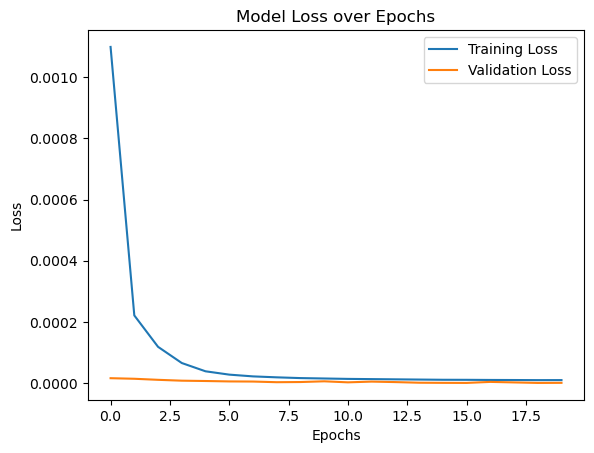

In [11]:
# Train the model with training data
history = model.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_val, y_val), verbose=1)

# Plot the training and validation loss over epochs to observe improvement
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


# Evaluating the Model

In [12]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Make predictions on the test data
predictions = model.predict(X_test)

# Calculate RMSE (Root Mean Squared Error)
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print(f"RMSE: {rmse}")

# Calculate MAPE (Mean Absolute Percentage Error)
mape = np.mean(np.abs((y_test - predictions) / y_test)) * 100
print(f"MAPE: {mape}%")

# Calculate MAE (Mean Absolute Error)
mae = mean_absolute_error(y_test, predictions)
print(f"MAE: {mae}")


288/288 [==============================] - 5s 9ms/step
RMSE: 0.0007572445866498422
MAPE: 20.466853955967984%
MAE: 0.0006283676624046071
